In [126]:
import pandas as pd
import numpy as np
import matplotlib

In [127]:
df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)


In [128]:
df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%
...,...,...,...,...,...
2006-01-10,"1,289.69","1,290.15","1,290.15","1,283.76",-0.04%
2006-01-09,"1,290.15","1,285.45","1,290.78","1,284.82",0.37%
2006-01-06,"1,285.45","1,273.48","1,286.09","1,273.48",0.94%


In [129]:
df_SPX['Price'] = pd.to_numeric(df_SPX['Price'].str.replace(',',''))
df_SPX['Open'] = pd.to_numeric(df_SPX['Open'].str.replace(',',''))
df_SPX['High'] = pd.to_numeric(df_SPX['High'].str.replace(',',''))
df_SPX['Low'] = pd.to_numeric(df_SPX['Low'].str.replace(',',''))
df_SPX['Change %'] = pd.to_numeric(df_SPX['Change %'].str.replace('%',''))
print(df_SPX.dtypes)

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object


In [130]:
df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
...,...,...,...,...,...
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94


In [131]:
df_SPX.sort_index(inplace=True)

In [132]:
df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
...,...,...,...,...,...
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08


In [133]:
rows = "'2015-06-01' <=Date and Date <= '2016-06-30'"
cols = ['Low', 'High']
data = df_SPX.query(rows)[cols]
data

,Low,High
Date,,
2015-06-01,2102.54,2119.15
2015-06-02,2099.14,2117.59
2015-06-03,2109.61,2121.92
2015-06-04,2093.23,2112.89
2015-06-05,2085.67,2100.99
...,...,...
2016-06-24,2032.57,2103.81
2016-06-27,1991.68,2031.45
2016-06-28,2006.67,2036.09


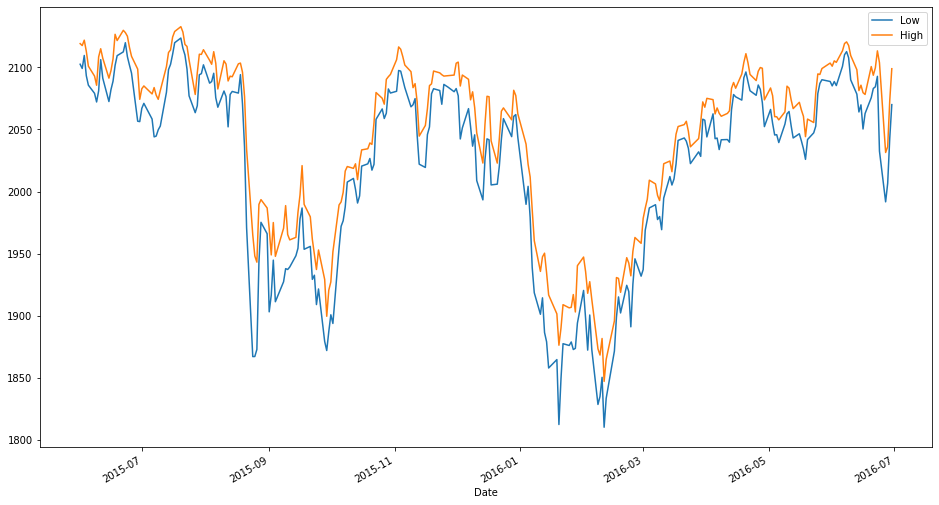

In [134]:
data.plot(figsize=(16,9))

In [135]:
byMonth = pd.Grouper(freq='BM')
funcs = ['max','min', 'mean']
newdata = data.groupby(byMonth).agg(funcs)
newdata

Low                           High                      
                max      min         mean      max      min         mean
Date                                                                    
2015-06-30  2119.89  2056.32  2092.077273  2129.87  2074.28  2109.400455
2015-07-31  2123.65  2044.02  2083.963636  2132.82  2074.28  2102.516818
2015-08-31  2095.27  1867.01  2024.972381  2112.66  1943.09  2058.501905
2015-09-30  1986.73  1871.91  1929.715714  2020.86  1899.48  1962.428095
2015-10-30  2082.63  1893.70  2009.497727  2094.32  1927.21  2030.578636
2015-11-30  2097.51  2019.39  2070.573000  2116.48  2044.64  2089.545500
2015-12-31  2082.93  1993.26  2041.347273  2104.27  2022.90  2067.892273
2016-01-29  2004.17  1812.29  1898.273158  2038.20  1876.18  1939.557895
2016-02-29  1945.78  1810.10  1887.279500  1962.96  1847.00  1917.261000
2016-03-31  2058.27  1937.09  2008.560909  2072.21  1978.35  2027.080000
2016-04-29  2096.32  2033.80  2065.265238  2111.05  2060.63  2083.424762
2016-05-31  2090.06  2025.91  2055.414286  2103.48  2044.21  2073.309524
2016-06-30  2112.71  1991.68  2072.063636  2120.55  2031.45  2093.831818